# Discontinuous Forcing Functions

This notebook investigates linear differential equations of the form 
$$y'' + my' + ky = f(t), \qquad k > 0, m \ge 0$$
which is exactly the forced damped oscillator. We will especially focus on the case where $m = 0$ ( the undamped case) and when $f(t)$ is a discontinuous function, like something of the type
$$u(t - c) = \begin{cases} 1 & t \ge c\\ 0 & t < c\end{cases}$$

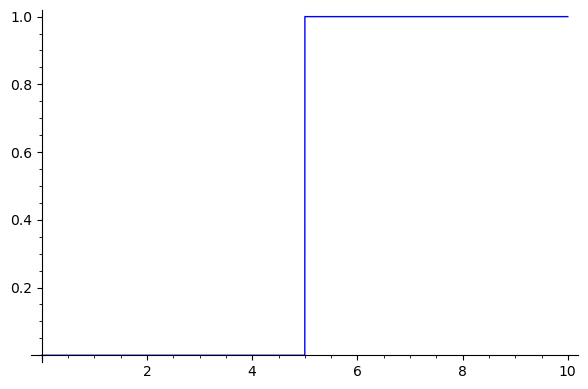

In [1]:
t = var('t')
c = 5
plot(unit_step(t-c), (t,0,10))

## Undamped case

Here we focus on the undamped case, in which case we set $k = \omega_f^2$. 

In [1]:
@interact
def plot_2nd_order_inhomogeneous(of = slider(vmin = 0.1, vmax = 5, default = 2, step_size = 0.1, label = "$\\omega_F$"),
                               oi = slider(vmin = 0.1, vmax = 6, default = 1.2, step_size = 0.02, label = 'square $\\omega$'), 
                               num_beats = slider([0,1,2,3,4,5,6,7,8,'infinity'], default = 2),
                               beat_width = slider(vmin = 0.2, vmax = .9, default = .5, step_size = 0.05, label = 'square width'),
                               tmax = slider(vmin = 5, vmax = 50, default = 20, step_size = 1, label = "max $t$ value"),
                               ymax = slider(vmin = 3, vmax = 10, default = 5, step_size = 1, label = "max $y$ value"),
                               forcing_term = checkbox(True, label = "Plot forcing term"),
                               auto_update = True):
    y0 = 0
    yp0 = 0
    t = var('t')
    y,ydot = var('y,ydot')
    m = 0
    k = of^2
    if num_beats == 'infinity':
        num_beats = floor(oi*tmax/(2*pi)+1)
    square = lambda c : unit_step(t -c) - unit_step(t-c - beat_width*2*pi/oi)
    beat_starts = [2 + k*2*pi/oi for k in range(num_beats)]
    #f(t) = unit_step(t-1) - unit_step(t-2) + unit_step(t-4) - unit_step(t-5)
    f(t) = sum(square(c)(t) for c in beat_starts)
    des = [ ydot,-m*ydot - k*y + f(t)]
    sol = desolve_system_rk4(des, [y,ydot], ivar = t, ics = [0,y0,yp0],end_points = tmax)
    soly = [(a,b) for (a,b,c) in sol]
    plt = list_plot(soly, plotjoined = True,
              title = "Solution plot, $\\omega_{sq} = " + str(oi.numerical_approx(digits = 1)) + "$", axes_labels = ['$t$', '$y$'], legend_label = "$y(t)$")
    if forcing_term:
        plt += plot(f, (t, 0, tmax), color = 'orange', alpha = 0.4, thickness =1.1, legend_label = "forcing term")
    show(plt, ymin = -ymax, ymax = ymax, figsize = 6)

Interactive function <function plot_2nd_order_inhomogeneous at 0x7f802ac5f310> with 7 widgets
  of: TransformF…

# Damped case

Now we consider the damped case, where $m$ and $k$ are arbitrary, and we no longer write them in terms of $\omega_f$. 

In [2]:
@interact
def plot_2nd_order_inhomogeneous(m = slider(vmin = 0, vmax = 5, default = 0.3, step_size = 0.05, label = "$m$"),
                               k = slider(vmin = 0.3, vmax = 3, default = 1.2, step_size = 0.05, label = "$k$"),
                               oi = slider(vmin = 0.1, vmax = 6, default = 1.2, step_size = 0.02, label = 'square $\\omega$'), 
                               num_beats = slider([0,1,2,3,4,5,6,7,8,'infinity'], default = 1),
                               beat_width = slider(vmin = 0.2, vmax = .9, default = .5, step_size = 0.05, label = 'square width'),
                               tmax = slider(vmin = 5, vmax = 50, default = 20, step_size = 1, label = "max $t$ value"),
                               ymax = slider(vmin = 3, vmax = 10, default = 5, step_size = 1, label = "max $y$ value"),
                               forcing_term = checkbox(True, label = "Plot forcing term"),
                               auto_update = True):
    y0 = 0
    yp0 = 0
    t = var('t')
    y,ydot = var('y,ydot')
    if num_beats == 'infinity':
        num_beats = floor(oi*tmax/(2*pi)+1)
    square = lambda c : unit_step(t -c) - unit_step(t-c - beat_width*2*pi/oi)
    beat_starts = [2 + k*2*pi/oi for k in range(num_beats)]
    #f(t) = unit_step(t-1) - unit_step(t-2) + unit_step(t-4) - unit_step(t-5)
    f(t) = sum(square(c)(t) for c in beat_starts)
    des = [ ydot,-m*ydot - k*y + f(t)]
    sol = desolve_system_rk4(des, [y,ydot], ivar = t, ics = [0,y0,yp0],end_points = tmax)
    soly = [(a,b) for (a,b,c) in sol]
    plt = list_plot(soly, plotjoined = True,
              title = "Solution plot, $\\omega_{sq} = " + str(oi.numerical_approx(digits = 1)) + "$", axes_labels = ['$t$', '$y$'], legend_label = "$y(t)$")
    if forcing_term:
        plt += plot(f, (t, 0, tmax), color = 'orange', alpha = 0.4, thickness =1.1, legend_label = "forcing term")
    show(plt, ymin = -ymax, ymax = ymax, figsize = 6)

Interactive function <function plot_2nd_order_inhomogeneous at 0x7f8017110550> with 8 widgets
  m: TransformFl…